# DS-SF-36 | 05 | Exploratory Data Analysis | Assignment | Starter Code

## Exploratory Data Analysis on the Advertising Dataset

You've been hired as a Data Science Consultant to provide advice to a client on how to improve sales of a particular product.  This client provided you with a dataset (the `Advertising` Dataset) consisting of the `Sales` of that product (in thousands
of units) in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `Radio`, and `Newspaper` (in thousands of dollars).<sup>(*)</sup>

In this assignment, we are going to do some basic exploratory data analysis.  We will revisit this dataset in later assignments.

<sup>(*)</sup> Source: An Introduction to Statistical Learning with Applications in R

In [1]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-advertising-starter.csv'))

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


> ### Question 1.  Make some boxplots!
> E.g., `df[ ['column(s) of interest'] ].plot(kind = 'box')`

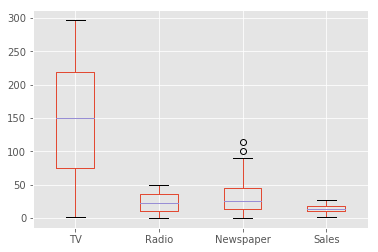

In [7]:
# TODO
df.plot(kind = 'box')

> ### Question 2.  What do we learn from TV, radio, newspaper and sales boxplots?

Answer: TODO

> ### Question 3.  Let's play with correlation!  Compute the correlation matrix of your data and explain what you've learned from it.  E.g., which variable can depict sales the best?  (TV, radio or newspaper)  What are the highest and lowest correlations?  What did you learn from the correlation matrix?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A32E4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7F67F0>]], dtype=object)

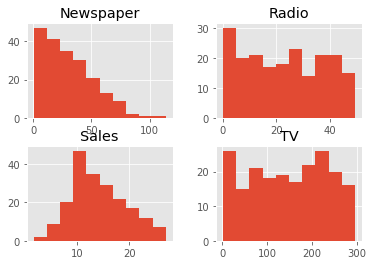

In [9]:
# TODO
df.corr()
#TV and sales better are correlated
df.hist()

Answer: TODO

## Let's get rid of outliers!

Directions:

1. Look over your boxplots and pick one variable that likely has outliers.
2. Find the Interquartile Range (IQR) of that variable.  You can do this in two different ways.
  - Use `df.describe()`
  - Use `df.quantile()`
3. Remember, one definition for outliers is anything that is more than `1.5 * IQR` above Q3 or `1.5 * IQR` below Q1.
4. Delete the rows for these outliers.

> ### Question 4.  Step 1:  Which variable seems to have outliers?

Answer: TODO

> ### Question 5.  Step 2: Compute the IQR

In [37]:
# TODO
#df.describe()

IQR = (df.quantile(.75).Newspaper -df.quantile(.25).Newspaper)
LR = df.quantile(.25).Newspaper - (1.5*IQR)
UR = df.quantile(.25).Newspaper + (1.5*IQR)

df['newrow'] = df['Newspaper'].apply(lambda x: 'Outlier' if (x >= UR or x <= LR) else 'NotOutlier')

df[df.newrow !="Outlier"]

,TV,Radio,Newspaper,Sales,newrow
1,44.5,39.3,45.1,10.4,NotOutlier
3,151.5,41.3,58.5,18.5,NotOutlier
4,180.8,10.8,58.4,12.9,NotOutlier
6,57.5,32.8,23.5,11.8,NotOutlier
7,120.2,19.6,11.6,13.2,NotOutlier
...,...,...,...,...,...
194,149.7,35.6,6.0,17.3,NotOutlier
195,38.2,3.7,13.8,7.6,NotOutlier
196,94.2,4.9,8.1,9.7,NotOutlier
197,177.0,9.3,6.4,12.8,NotOutlier


> ### Question 6.  Steps 3 and 4: Remove the outliers

In [ ]:
# TODO

> ### Question 7.  Your last mission!  Our goal is to divide our dataset to high and low sales.  We would like to add a binary variable called `Sales_High` which is 1 if sales of that specific observation is above the median of all sales and 0 otherwise.

In [43]:
# TODO
#df.Sales.median()
df['Sales_High'] = df['Sales'].apply(lambda x: '1' if (x >= df.Sales.median() ) else '0')
df

,TV,Radio,Newspaper,Sales,newrow,Sales_High
0,230.1,37.8,69.2,22.1,Outlier,1
1,44.5,39.3,45.1,10.4,NotOutlier,0
2,17.2,45.9,69.3,9.3,Outlier,0
3,151.5,41.3,58.5,18.5,NotOutlier,1
4,180.8,10.8,58.4,12.9,NotOutlier,1
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,NotOutlier,0
196,94.2,4.9,8.1,9.7,NotOutlier,0
197,177.0,9.3,6.4,12.8,NotOutlier,0
198,283.6,42.0,66.2,25.5,Outlier,1


> ### Question 8.  Save the dataset as `dataset-05-advertising.csv` in the `datasets` folder.

In [ ]:
# TODO